In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 *np.random.randn(100)

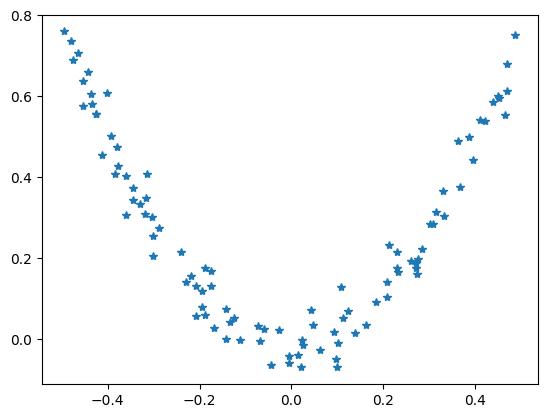

In [3]:
plt.plot(X,y,"*")
plt.show()

In [4]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

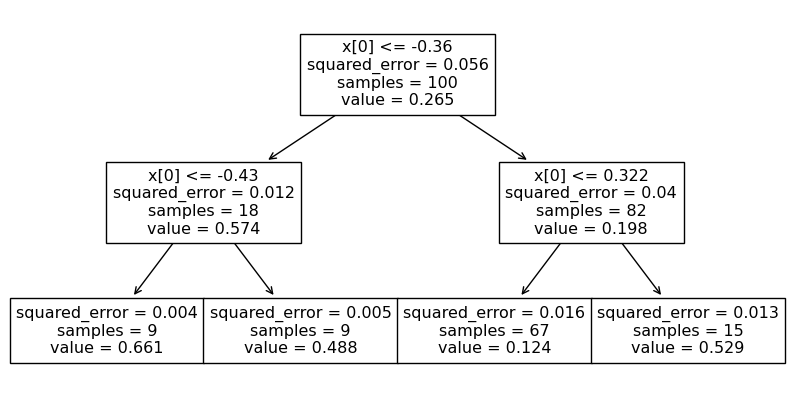

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(tree_reg1)
plt.show()

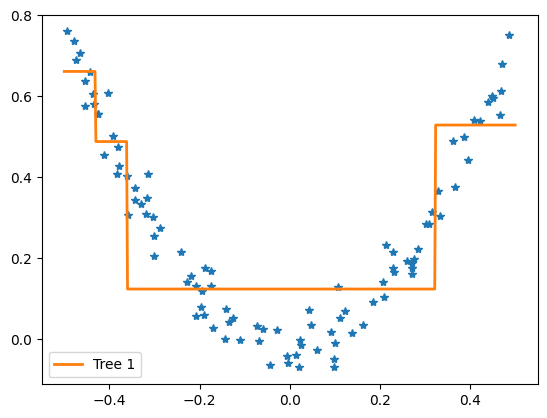

In [6]:
x1 = np.linspace(-0.5,0.5,500).reshape(-1,1)
y_pred = tree_reg1.predict(x1)
plt.plot(X,y,"*")
plt.plot(x1,y_pred,linewidth=2, label='Tree 1')
plt.legend()
plt.show()

In [7]:
y2 = (y - tree_reg1.predict(X))
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

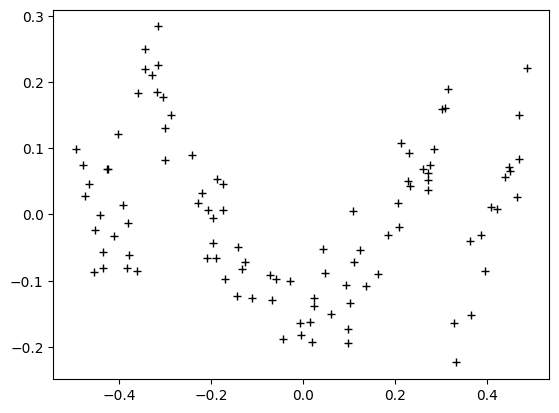

In [8]:
plt.plot(X,y2,"+k")

In [9]:
y3 =(y2 - tree_reg2.predict(X))
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [10]:
X_new = np.array([[0.5]])
model_tree = [tree_reg1, tree_reg2, tree_reg3]
lr = 1
y_pred = np.sum([lr*tree.predict(X_new) for tree in model_tree])
y_pred

0.750267810685574

In [ ]:
[tree.predict(X_new) for tree in model_tree]

In [12]:
def plot_predictions(regressors, X,y,style="r-", data_style='b.',data_label=None,label=None):
  x1 = np.linspace(-0.5,0.5,500).reshape(-1,1)
  y_pred = sum(regressor.predict(x1) for regressor in regressors)
  plt.plot(X[:,0],y,data_style,label = data_label)
  plt.plot(x1,y_pred,style,linewidth=2,label=label)


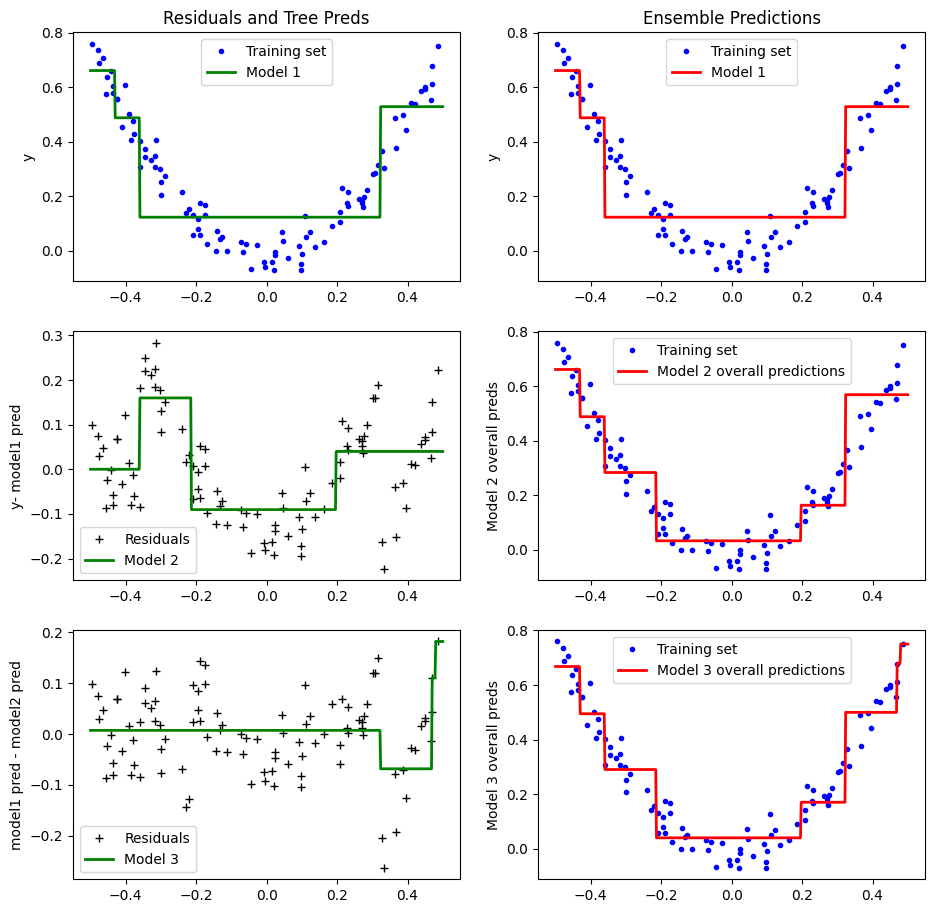

In [13]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X,y,label='Model 1', style='g-', data_label='Training set')
plt.ylabel("y")
plt.title("Residuals and Tree Preds")
plt.legend()

plt.subplot(322)
plot_predictions([tree_reg1], X,y,label='Model 1', data_label='Training set')
plt.ylabel("y")
plt.title("Ensemble Predictions")
plt.legend()

plt.subplot(323)
plot_predictions([tree_reg2], X,y2,label='Model 2', style='g-', data_style='k+', data_label='Residuals')
plt.ylabel("y- model1 pred")
plt.legend()

plt.subplot(324)
plot_predictions([tree_reg1,tree_reg2], X,y,label='Model 2 overall predictions', data_label='Training set')
plt.ylabel("Model 2 overall preds")
plt.legend()

plt.subplot(325)
plot_predictions([tree_reg3], X,y3,label='Model 3', style='g-', data_style='k+', data_label='Residuals')
plt.ylabel("model1 pred - model2 pred")
plt.legend()

plt.subplot(326)
plot_predictions([tree_reg1,tree_reg2,tree_reg3], X,y,label='Model 3 overall predictions',data_label='Training set')
plt.ylabel("Model 3 overall preds")
plt.legend()
plt.show()


In [ ]:
# figure
# axes
